In [52]:
import numpy as np
import numpy.linalg as LA
from util.util_lrp_transformation_visualization import norm_arr

from util.util_vector_fields import plot_vector_field

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
W = np.random.uniform(size=(3,3))
W /= W.sum(axis=0, keepdims=True)
W[:, 0] *= 2

W

array([[0.40211113, 0.30203819, 0.31502097],
       [0.8464246 , 0.45063572, 0.27604124],
       [0.75146427, 0.24732609, 0.40893779]])

In [11]:
LA.eig(W)

(array([ 1.263468  , -0.16963198,  0.16784861]),
 array([[ 0.45069419,  0.60585914,  0.02061335],
        [ 0.66974788, -0.58852252, -0.7292845 ],
        [ 0.59018008, -0.53532788,  0.68389999]]))

In [29]:
np.random.seed(1)

# dimensionality
n=2

def analyse(W, num_random=3):
    evalues, evecs = LA.eig(W)
    print("Largest EV:", evalues.max(), '\n')
    
    print("Tranforming eigenvectors (with L1 = 1):")
    for evec, evalue in zip(evecs.T, evalues):        
        print(f"Evalue = {evalue:.2f}")
        
        x = norm_arr(*evec)
        print(f"x: L1={LA.norm(x, ord=1):.2f}  L2={LA.norm(x, ord=2):.2f}")
        
        y = W @ x
        print(f"y: L1={LA.norm(y, ord=1):.2f}  L2={LA.norm(y, ord=2):.2f}\n")
        
    if num_random > 0: 
        print("Transforming random vectors (with L1 = 1):")
        for vec in range(4):
            x = norm_arr(*np.random.uniform(size=W.shape[0]))
            print(f"x: L1={LA.norm(x, ord=1):.2f}  L2={LA.norm(x, ord=2):.2f}")

            y = W @ x
            print(f"y: L1={LA.norm(y, ord=1):.2f}  L2={LA.norm(y, ord=2):.2f}\n")
        

for matrix in range(0):
    W = np.exp(np.random.uniform(4, size=(n,n)))
    W /= W.sum(axis=0, keepdims=True)
    # W[:, 0] *= 2
    
    # W = np.array([[1,1], [0,0]])
    
    analyse(W)
    
    print('='*10)
    
W = np.random.normal(0, 3, size=(n,n))
print(W, '\n')
analyse(W)

[[ 4.87303609 -1.83526924]
 [-1.58451526 -3.21890587]] 

Largest EV: 5.217724888800116 

Tranforming eigenvectors (with L1 = 1):
Evalue = 5.22
x: L1=1.00  L2=0.86
y: L1=5.22  L2=4.47

Evalue = -3.56
x: L1=1.00  L2=0.84
y: L1=3.56  L2=3.00

Transforming random vectors (with L1 = 1):
x: L1=1.00  L2=0.72
y: L1=3.54  L2=2.72

x: L1=1.00  L2=0.73
y: L1=3.31  L2=2.69

x: L1=1.00  L2=0.83
y: L1=3.48  L2=2.97

x: L1=1.00  L2=0.96
y: L1=4.73  L2=3.52



In [30]:
LA.eig(np.eye(2))

things on her oardon
break a lease
kick nicole and roommate out 

lack of respect

no support system.
not in a good space

just wants to use men.


slacking off... riding it, not throwing herself into work

(array([1., 1.]),
 array([[1., 0.],
        [0., 1.]]))

## Qs
- How far away are the per-layer activations from the stationary distribution of the following weight matrix.
- Ideally the stationary distribution is extracted as the eigenvector with eigenvalue 1.

# Analysing some matrices

In [9]:
import numpy as np
import numpy.linalg as LA
# import matplotlib.pyplot as plt

from util.util_vector_fields import rotation

In [49]:

R = rotation(90, 45)

print(R)
print('cols: \t', LA.norm(R[:, 0]), '\t', LA.norm(R[:, 1]))
# print('rows: \t', LA.norm(R[0, :]), '\t', LA.norm(R[1, :]))

[[6.12323400e-17 7.07106781e-01]
 [1.00000000e+00 7.07106781e-01]]
cols: 	 1.0 	 1.0


In [46]:
mini = 1000
np.random.seed(1)
for _ in range(20):
    x = norm_arr(*np.random.uniform(0,1,size=(2)), norm=2)
    n = LA.norm(R @ x)
    print(n)
    
    mini = min(mini, n)

1.270122534296592
1.0002674683125703
1.2796317991710444
1.261216367556441
1.2943108769109892
1.2765395326088915
1.1455739649202055
1.0284319486872477
1.2953915585490199
1.2911830010866177
1.3017441712503734
1.2374719626399089
1.3065057035710794
1.239491370771935
1.1241192884327176
1.1459482741137628
1.2652949492014196
1.238504061971175
1.3014693309692675
1.0170828833909988


In [43]:
mini

1.0002674683125703

In [41]:
LA.eig(R)

(array([0.35355339+0.76295923j, 0.35355339-0.76295923j]),
 array([[-0.27059805+0.58394371j, -0.27059805-0.58394371j],
        [ 0.76536686+0.j        ,  0.76536686-0.j        ]]))

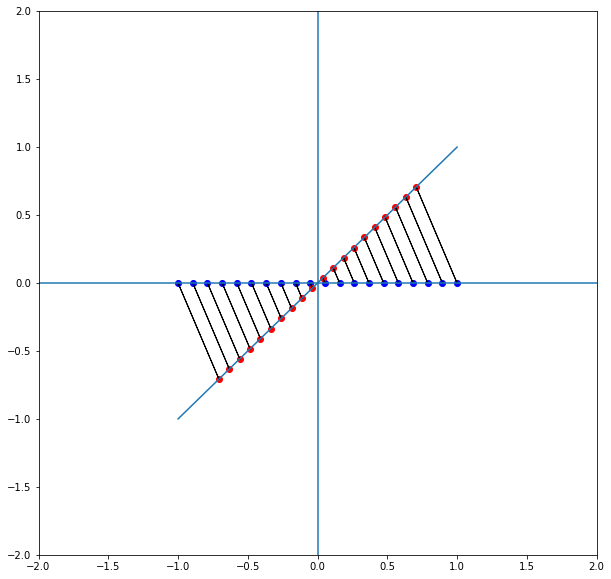

In [279]:
plt.figure(figsize=(10,10))
plt.xlim(-2,2)
plt.ylim(-2,2)

for vec in np.vstack((np.linspace(-1,1, 20), np.zeros(20))).T:
    proj = A @ vec
    plt.scatter(*vec, color='b')
    plt.scatter(*proj, color='r')
    plt.arrow(*vec, *(proj-vec))
    
plt.axvline(0)
plt.axhline(0)
plt.plot((-1,1), (-1,1))

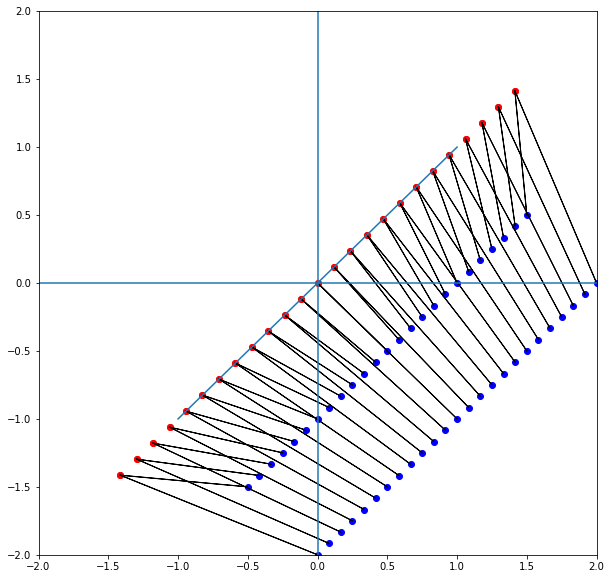

In [300]:
plt.figure(figsize=(10,10))
plt.xlim(-2,2)
plt.ylim(-2,2)


for vec in a(1,-1)[None, :] + np.linspace(-1,1, 25)[:, None]:
    proj = A @ vec
    plt.scatter(*vec, color='b')
    plt.scatter(*proj, color='r')
    plt.arrow(*vec, *(proj-vec))
    
for vec in a(.5,-.5)[None, :] + np.linspace(-1,1, 25)[:, None]:
    proj = A @ vec
    plt.scatter(*vec, color='b')
    plt.scatter(*proj, color='r')
    plt.arrow(*vec, *(proj-vec))
    
plt.axvline(0)
plt.axhline(0)
plt.plot((-1,1), (-1,1))

In [373]:
lims = np.array([-.1, .1])
n_points = 3

step = (lims[1]-lims[0]) / (n_points - 1)

step, np.mgrid[lims[0]:lims[1]+1e-5:step]

(0.1, array([-0.1,  0. ,  0.1]))

### Singular matrices

(81, 2)


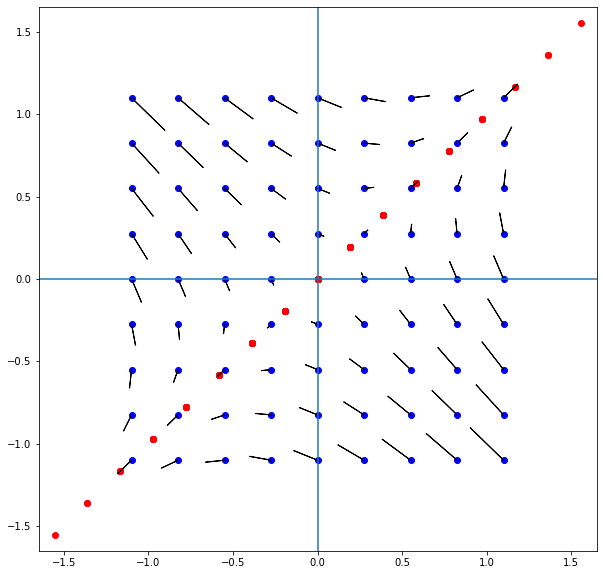

In [496]:
deg = 45
plot_vector_field(rotation(deg, deg), small_arrows=1)

(81, 2)


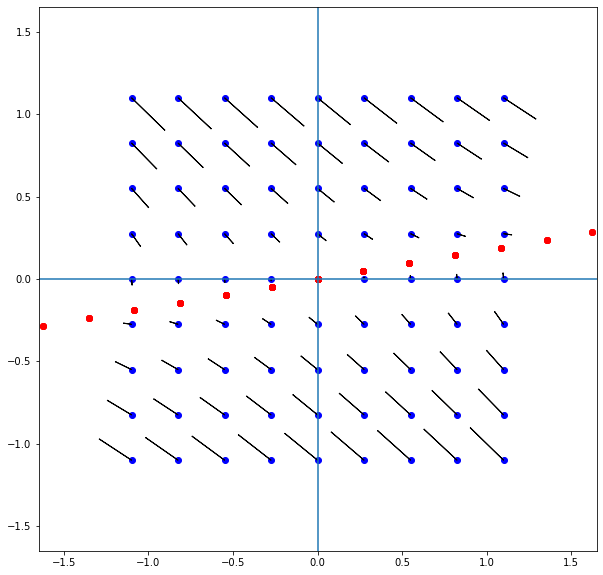

In [449]:
deg = 10
plot_vector_field(rotation(deg, deg))

(81, 2)


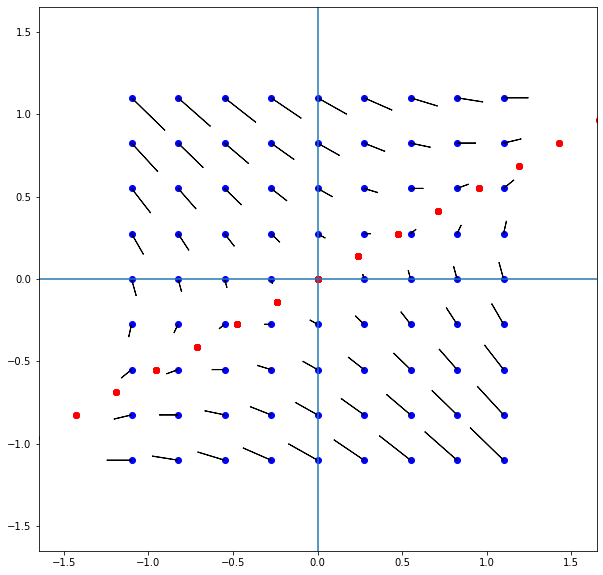

In [450]:
deg = 30
plot_vector_field(rotation(deg, deg))

(81, 2)


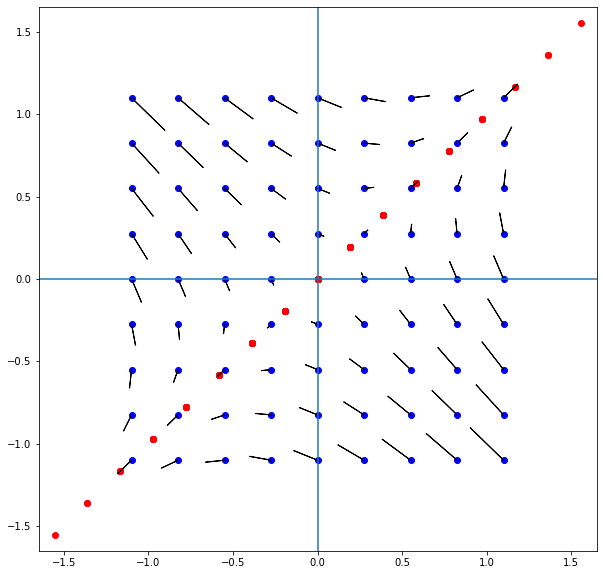

In [451]:
deg = 45
plot_vector_field(rotation(deg, deg))

### Non-singular (different projections of basis vectors)

(49, 2)


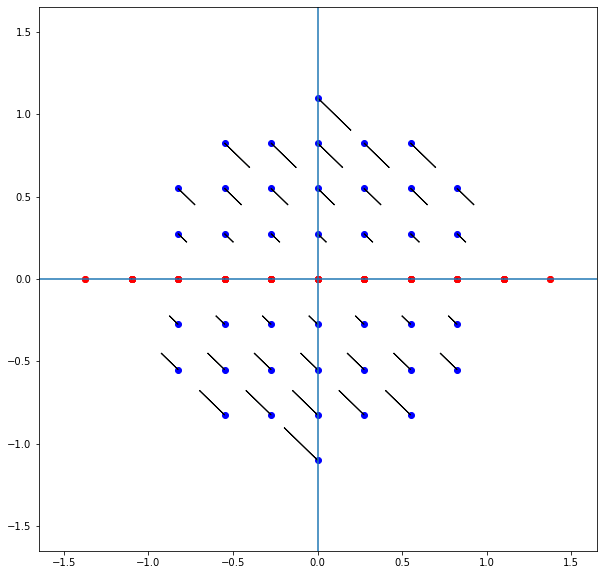

In [456]:
deg = 0
diff = 0

plot_vector_field(rotation(deg-diff/2, deg+diff/2), small_arrows=1, circular_points=1)

(49, 2)


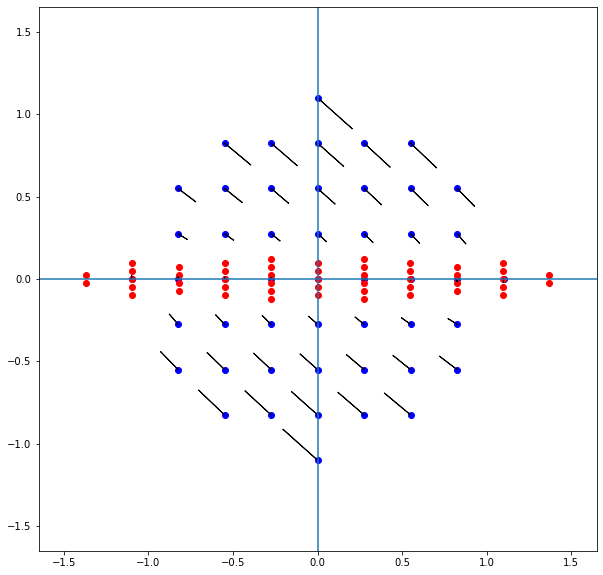

In [454]:
deg = 0
diff = 10

plot_vector_field(rotation(deg-diff/2, deg+diff/2), small_arrows=1, circular_points=1)

(49, 2)


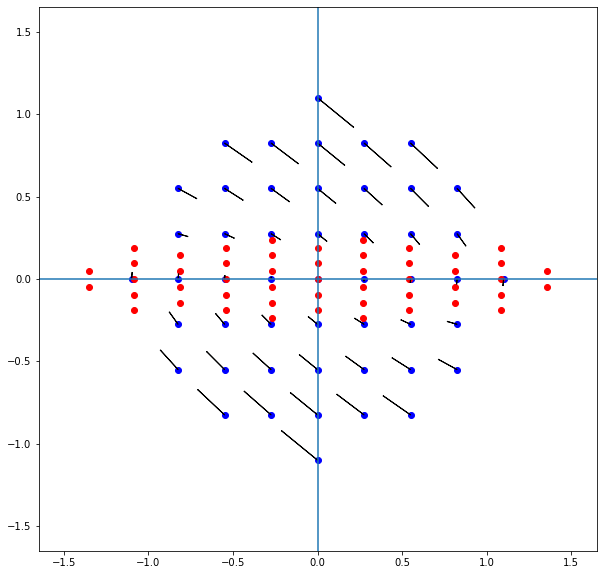

In [457]:
deg = 0
diff = 20

plot_vector_field(rotation(deg-diff/2, deg+diff/2), small_arrows=1, circular_points=1)

(149, 2)


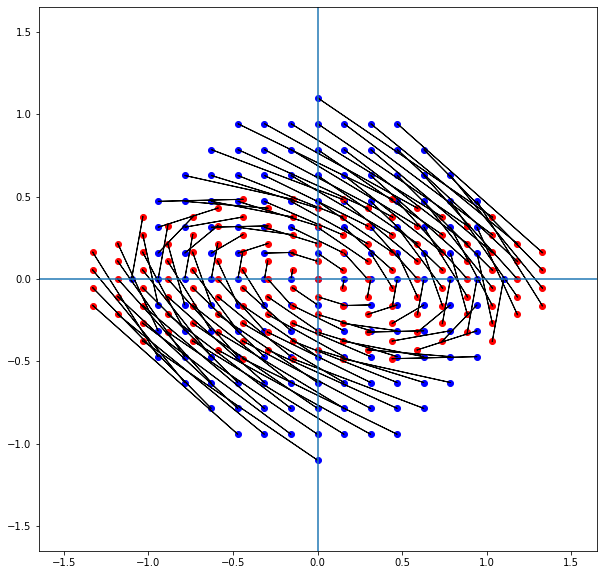

In [469]:
deg = 0
diff = 40

plot_vector_field(rotation(deg-diff/2, deg+diff/2), n_points=15, small_arrows=0, circular_points=1)

### Clips

(149, 2)


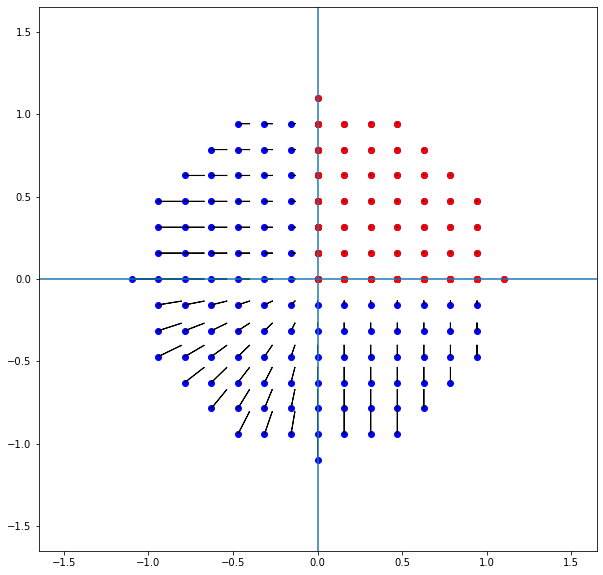

In [471]:
deg = 0
diff = 40

plot_vector_field(trans=lambda x: np.clip(x, 0, np.inf), n_points=15, small_arrows=1, circular_points=1)

## EVs of 'rotation' matrices

In [493]:
A = rotation(-10,0)
print(A)
print()

for val, vec in zip(LA.eig(A)[0], LA.eig(A)[1].T):
    print(val)
    print(vec)
    print()

[[ 0.98480775  1.        ]
 [-0.17364818  0.        ]]

0.754726959614145
[ 0.97453798 -0.22422247]

0.230080793398063
[-0.79818532  0.60241198]



## How do transformations by "L2-stochastic" matrices look like?
(Matrices whose columns have l2 norm of 1.)

In [60]:
A = rotation(-15, 15)
A

array([[1., 1.],
       [0., 0.]])

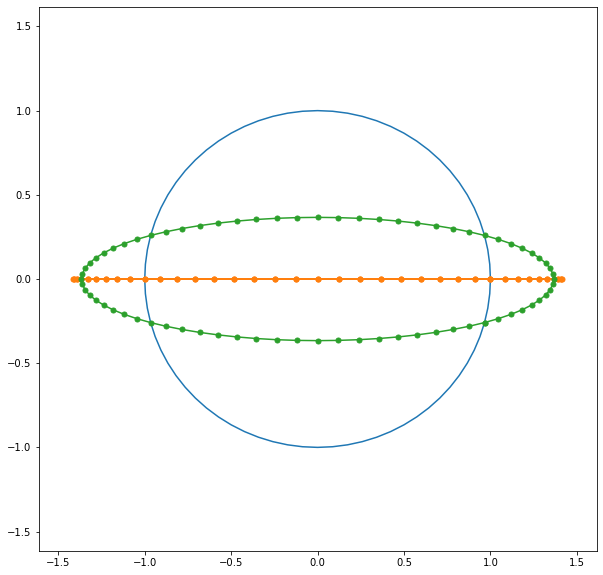

In [215]:
def generate_points(point_every = 5):
    degs = np.arange(0,360+point_every,point_every)
    degs = degs/180*np.pi
    
    points = np.empty(shape=(2, int(360/point_every)+1))
    points[0], points[1] = np.cos(degs), np.sin(degs)
    
    return points

def set_bounds():
    mini, maxi = np.array(points_list).min(), np.array(points_list).max()
    plt.xlim(mini-.2, maxi+.2)
    plt.ylim(mini-.2, maxi+.2)
    
def plot_unit_circle_transformation(points, trans=None, line=True, ms=10):
    if trans is None: # plot wo transformation
        plt.plot(*points, '.-' if line else '.', ms=ms)
    else:
        points = trans(points)
        plt.plot(*points, '.-' if line else '.', ms=ms)

    return points


plt.figure(figsize=(10,10))
    
points = plot_unit_circle_transformation(generate_points(), ms=0)
points_list = [points]

for deg in range(0,30,15):
    A = rotation(-deg, deg)
    trans = lambda v: A @ v
    
    points = plot_unit_circle_transformation(generate_points(), trans)
    points_list.append(points)

set_bounds()

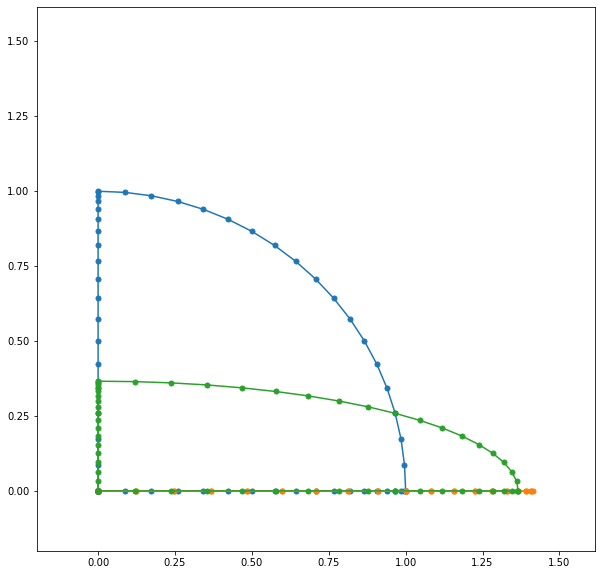

In [216]:
def clip():
    plt.figure(figsize=(10,10))

    for i, points in enumerate(points_list):
        trans = lambda v: np.clip(v, 0, np.inf)

        points_list[i] = plot_unit_circle_transformation(points, trans)
        
    set_bounds()
        
clip()

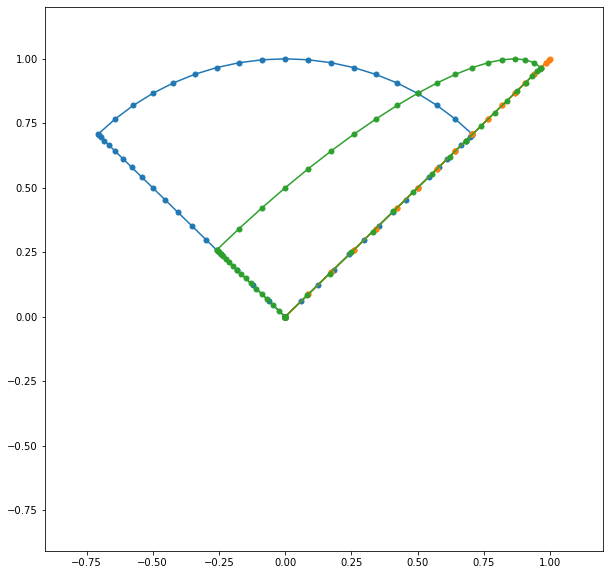

In [217]:
def rotate(deg):
    plt.figure(figsize=(10,10))

    for i, points in enumerate(points_list):
        trans = lambda v: rotation(deg) @ v

        points_list[i] = plot_unit_circle_transformation(points, trans)
        
    set_bounds()
        
rotate(45)

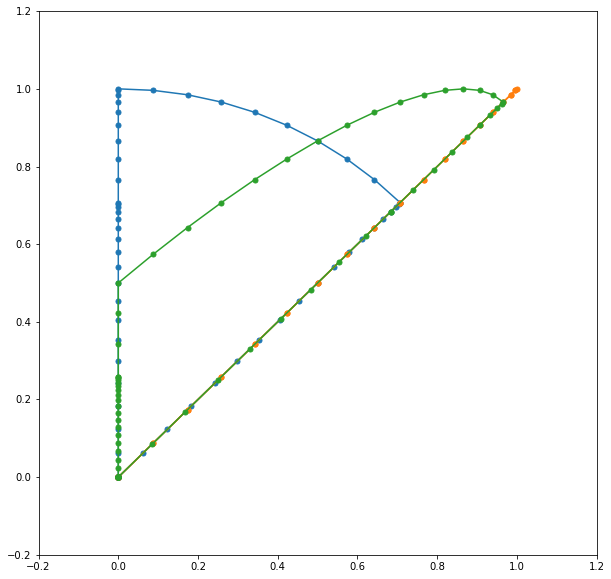

In [218]:
clip()

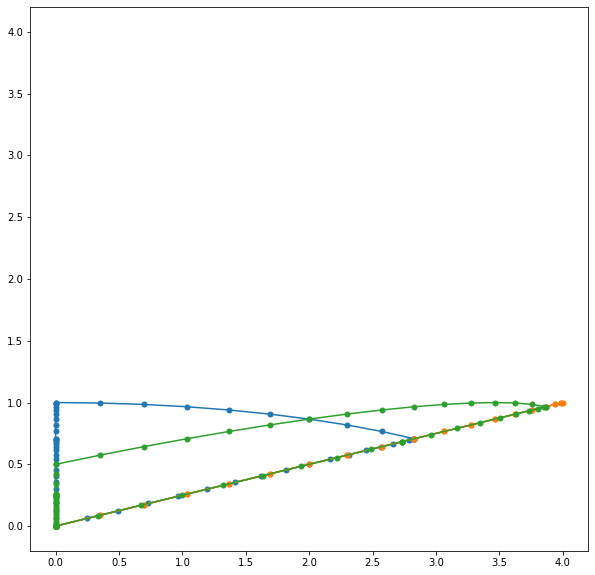

In [219]:
def stretch(factor_x, factor_y):
    plt.figure(figsize=(10,10))

    for i, points in enumerate(points_list):
        trans = lambda v: np.array([[factor_x, 0], [0, factor_y]]) @ v

        points_list[i] = plot_unit_circle_transformation(points, trans)
        
    set_bounds()
        
stretch(4, 1)

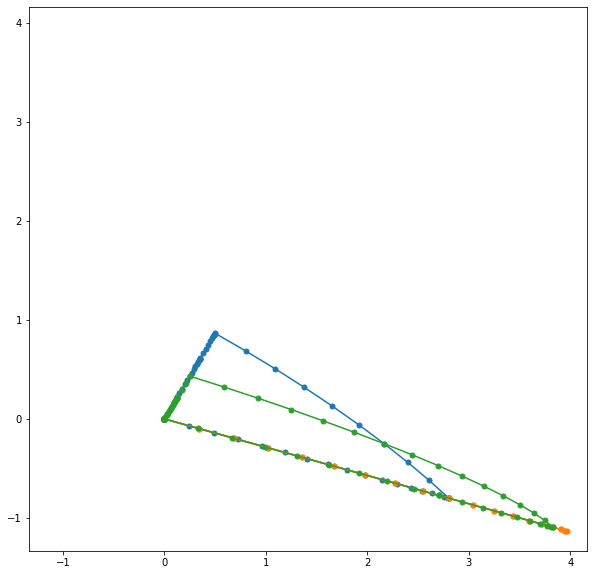

In [220]:
rotate(-30)

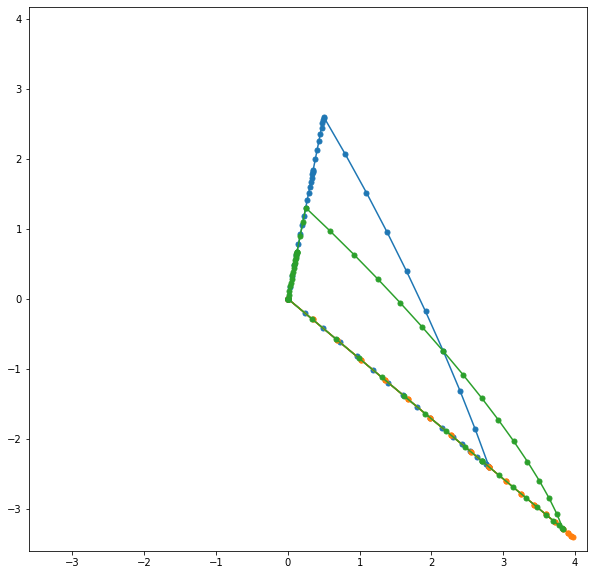

In [221]:
stretch(1, 3)

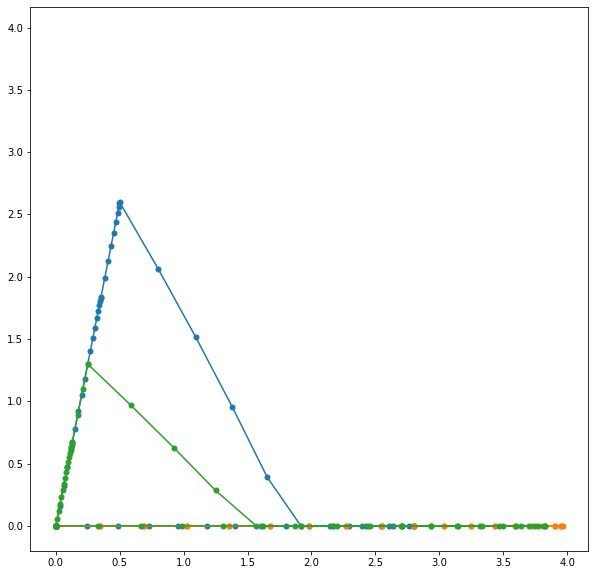

In [222]:
clip()